# Bias variance tradeoff

### Objectives:
1. Understand the problems of a machine learning algorithms
2. How to generalize the learning algorithm
3. Understand Bias-Variance Trade off to select the best model that generalizes the distributions of data. 


In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('../Style/deeplearning.mplstyle')

# Detect model's performance

### Let's say we have trained a model
case 1: the model's train acc is very good, but test acc is very bad (Overfitting) [Problem]
case 2: the model's train acc is very bad (Underfitting) [Problem]
case 3: the model's train acc is fairly good, so does the test acc (Generalization)


### Choosing the right model
- linear_model_v1 test_acc_v1 train_acc_v1
- linear_model_v2 test_acc_v2 train_acc_v2
- linear_model_v3 test_acc_v3 train_acc_v3

What if all the test accuracies are same? <br>
Which one is the best model?


In [45]:
np.random.seed(142)

# Generate Data

In [46]:
X = np.random.randn(1000)
y = ((X ** 5) + (-2 * (X ** 4)) - 4.2 * (X ** 3) + 20 * (X ** 2) + 6 ** X + 2)

## Add noise

In [47]:
y[0:20] = y[0:20] - 100
y[100:140] = y[100:140] - 30
y[900:920] = y[900:920] - 20
y[200:520] = y[200:520] + np.random.randint(25, 100, (320,))
y[500:520] = y[500:520] - 50
y[600:640] = y[600:640] - 25

## Split Data

In [48]:
x_train = X[:800]
y_train = y[:800]
x_test = X[800:]
y_test = y[800:]

## Plot Dataset

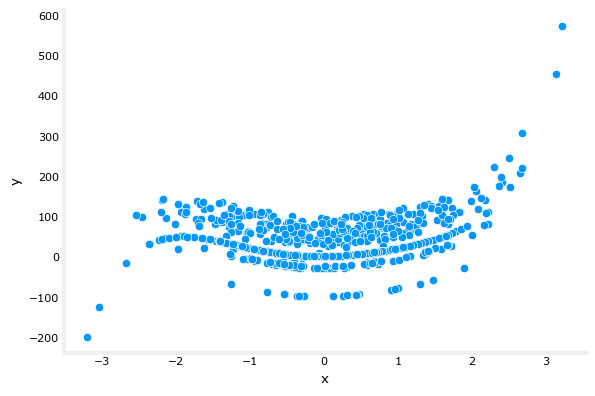

In [49]:
sns.relplot(
    data = pd.DataFrame({'x': x_train, 'y': y_train}),
    x = 'x',
    y = 'y',
    kind='scatter',
    height=4,
    aspect=1.5
)

# Polynomial regression with different degrees

- polynomial equation with
- deg = 1 => y = a * x + b
- deg = 2 => y = a * x^2 + b * x + c
- deg = 3 => y = a * x^3 + b * x^2 + c * x + d

In [50]:
def fit_line(x_train, y_train, x_test, deg):
    poly_regression_model = np.polyfit(x_train, y_train, deg)
    y_test_pred = np.polyval(poly_regression_model, x_test)
    y_train_pred = np.polyval(poly_regression_model, x_train)  # Make sure this matches y_train
    return y_train_pred, y_test_pred  # Swap return order

## Bias 
Definition: Bias refers to the error due to overly simplistic assumptions in the learning algorithm.<br>
High bias: means your model is too simple to fit your data. (Not desired) => Underfitting<br>
Low bias: achieved when the model is flexible enough to fit your data. (Desired)

In [51]:
def get_bias(y_pred, y_true):
    return np.round(np.mean((y_pred - y_true) ** 2), 0)

## Variance
Variance refers to the model's sensitivity to small fluctuations in the training data.<br>

High variance: occurs when the model is too complex and fits the noise in the training data. (Not desired) (overfitting)<br>
Low variance: achieved when the model is able to generalize the new data (Desired) <br>

Trade-off: Increasing model complexity generally decreases bias but increases variance.<br>

In [52]:
def get_variance(y_pred):
    return np.round(np.var(y_pred), 0)

## Calculate Metrics

In [53]:
def get_metrics(y_train, y_test, y_train_pred, y_test_pred):
    training_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    bias = get_bias(y_test_pred, y_test)
    variance = get_variance(y_test_pred)    
    total_error = bias ** 2 + variance
    return [training_mse,test_mse,bias,variance,total_error]

In [54]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (800,)
y_train shape: (800,)
x_test shape: (200,)
y_test shape: (200,)


In [55]:
degree=np.arange(1,21)

train_mse_list=[]
test_mse_list=[]
biases=[]
variances=[]
total_errors=[]

for deg in degree:
    y_train_pred, y_test_pred = fit_line(x_train, y_train, x_test, deg)
    train_mse, test_mse, bias, variance, total_error = get_metrics(y_train, y_test, y_train_pred, y_test_pred)
    
    biases.append(bias)
    variances.append(variance)
    total_errors.append(total_error)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

In [56]:
metrics_df = pd.DataFrame({
    'degree':degree,
    'train_mse':train_mse_list,
    'test_mse':test_mse_list,
    'bias':biases,
    'variance':variances,
    'total_error':total_errors
})

metrics_df = metrics_df.set_index('degree')
metrics_df.head(20)

,train_mse,test_mse,bias,variance,total_error
degree,,,,,
1,2926.805777,1106.342360,1106.0,132.0,1223368.0
2,2200.182874,552.272966,552.0,639.0,305343.0
3,1783.660722,471.784795,472.0,760.0,223544.0
4,1773.968094,488.182476,488.0,800.0,238944.0
5,1594.910963,476.203012,476.0,829.0,227405.0
6,1593.564699,473.107826,473.0,825.0,224554.0
7,1592.825246,474.455691,474.0,836.0,225512.0
8,1591.883166,473.699707,474.0,850.0,225526.0
9,1590.169824,467.189733,467.0,813.0,218902.0


## Trend of the metrics w.r.t the complexity of the model <br>

Observation 1. train_mse reduces as model becomes more complex<br>
Observation 2. test_mse reduces as model becomes more complex<br>
Observation 3. bias reduces as model becomes more complex<br>
Observation 4. variance increases as model becomes more complex<br>
12 is the optimal number of layers for the model to achieve the best trade-off between bias and variance.

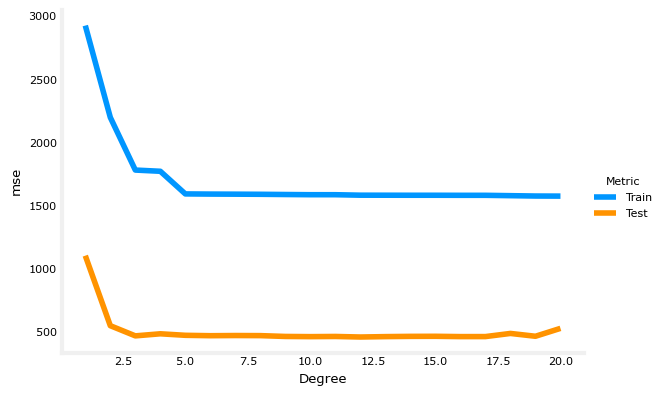

In [57]:
__ = pd.DataFrame({
    'Degree': list(degree) + list(degree),
    'mse': train_mse_list + test_mse_list,
    'Metric': ['Train'] * len(biases) + ['Test'] * len(variances)
})

sns.relplot(
    data=__,
    x='Degree', 
    y='mse', 
    kind="line", 
    hue='Metric',
    height=4, 
    aspect=1.5,
)

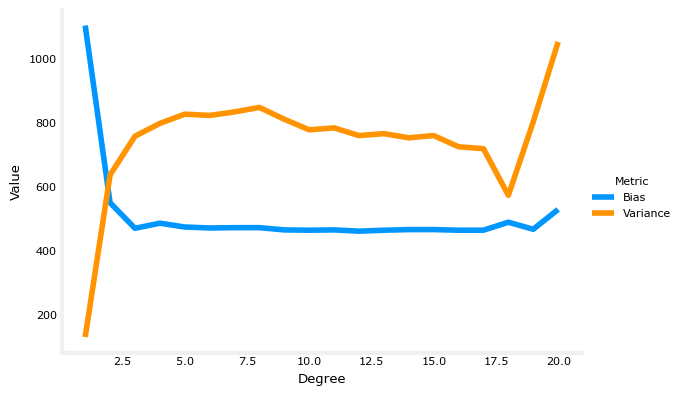

In [58]:
__ = pd.DataFrame({
    'Degree': list(degree) + list(degree),
    'Value': biases + variances,
    'Metric': ['Bias'] * len(biases) + ['Variance'] * len(variances)
})

# Create the scatter plot using seaborn with hue for Bias and Variance
sns.relplot(
    data=__,
    x='Degree', 
    y='Value', 
    kind="line", 
    hue='Metric',
    height=4, 
    aspect=1.5,
)

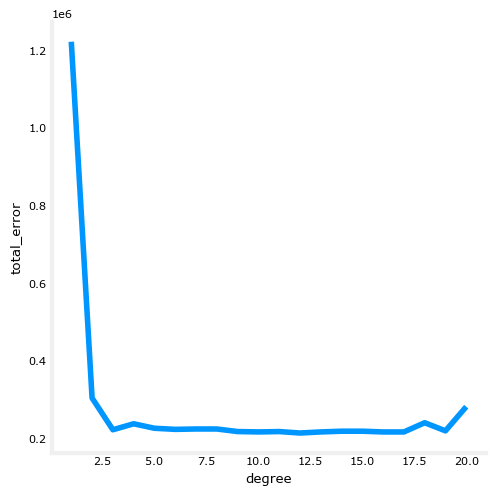

In [59]:
sns.relplot(
    data=metrics_df,
    x='degree',
    y='total_error', 
    kind="line",
)